# Processing and Machine Learning for FEMALES

In [ ]:
#Importing necessary modules for processing and machine learning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

Notebook last run (end-to-end): 2024-08-07 04:07:47.921634


In [ ]:
df = pd.read_csv("Female.csv")

In [ ]:
df

,Unnamed: 0,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,2,45.000,0,582,1,38,0,319000.0,0.9,140,0,0,244,0
1,6,63.000,1,122,1,60,0,172000.0,1.2,145,0,0,147,0
2,7,70.000,1,171,0,50,1,358000.0,0.9,141,0,0,196,0
3,10,60.667,1,151,1,40,1,257000.0,1.0,136,0,0,172,0
4,11,72.000,1,110,0,25,0,237000.0,1.0,140,0,0,65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1767,4995,45.000,0,582,1,55,0,543000.0,1.0,132,0,0,250,0
1768,4996,60.000,1,582,0,30,1,127000.0,0.9,145,0,0,95,0
1769,4997,95.000,1,112,0,40,1,196000.0,1.0,138,0,0,24,1
1770,4998,65.000,1,160,1,20,0,327000.0,2.7,116,0,0,8,1


In [ ]:
df['age'] = df['age'].astype(int)

In [ ]:
#This line of code shuffles the dataset around each time its run. This reduces the bias of the work.
df = shuffle(df)

## Train - Test Split

In [ ]:
#The dataset used for machine learning will be split into training and testing datasets. Training dataset will be used for training the dataset whilst the test data will be the unseen data used for testing the models.
from sklearn.model_selection import train_test_split

In [ ]:
#Here we are extracting the key parameters and their datapoints which will be used in the machine learning. The X consists of the dependant variable which will influence the y variable or the variable we are predicting.
X = df[["ejection_fraction","serum_creatinine","serum_sodium","platelets","diabetes","anaemia","creatinine_phosphokinase","smoking","age","high_blood_pressure"]]
y = df[["DEATH_EVENT"]]

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40, random_state = 4)


In [ ]:
X_train

,ejection_fraction,serum_creatinine,serum_sodium,platelets,diabetes,anaemia,creatinine_phosphokinase,smoking,age,high_blood_pressure
1746,60,1.0,140,208000.00,1,1,157,0,68,0
218,35,0.8,133,268000.00,1,0,835,0,70,1
344,40,1.0,139,164000.00,0,1,300,0,58,0
1392,60,0.8,137,300000.00,1,1,200,0,58,0
1620,38,1.0,136,162000.00,1,1,68,0,66,1
...,...,...,...,...,...,...,...,...,...,...
514,35,1.1,142,263358.03,1,0,892,0,65,0
1114,60,1.1,136,255000.00,0,1,59,0,70,0
324,55,0.8,141,236000.00,1,0,615,0,45,0
1564,38,1.0,136,162000.00,1,1,68,0,66,1


In [ ]:
y_train

,DEATH_EVENT
1746,0
218,0
344,0
1392,0
1620,0
...,...
514,0
1114,0
324,0
1564,0


### Sythethic Minority Oversampling Technique (SMOTE)

In [ ]:
#Our dataset has a class imbalance where one class is more popular then the others, this can have an affect on the performance of machine learning as the learning model with tend to majority class.
#To solve the problem of class imbalance, we need to balance out so that both classes are equal. We can utilise a SMOTE which will use interpolation to generate synthetic datapoints.
df["DEATH_EVENT"].value_counts()

DEATH_EVENT
0    1278
1     494
Name: count, dtype: int64

In [ ]:

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 2)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train.values.ravel())
X_train_balanced.shape

(1528, 10)

In [ ]:
np.unique(y_train_balanced, return_counts = True)

(array([0, 1]), array([764, 764]))

# Regression

## Linear Regression

In [ ]:
#Importing and training linear regression model
from sklearn.linear_model import LinearRegression
linearRegression = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, positive=False)
linearRegression.fit(X_train_balanced, y_train_balanced)

LinearRegression(n_jobs=1)

In [ ]:
#Obtaining the current parameters used for linear regression
linearRegression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'positive': False}

In [ ]:
#Determining the parameter space to be used by GridSearchCV to determine the best possible parameters which will provide the best possible performance.
param_space = {'copy_X': [True,False],
               'fit_intercept': [True,False],
               'n_jobs': [1,5,10,15,None],
               'positive': [True,False]}

In [ ]:
grid_search = GridSearchCV(linearRegression, param_space, cv=5)

grid_search.fit(X_train_balanced, y_train_balanced)

# Parameter which gives the best results
print(f"Best Hyperparameters: {grid_search.best_params_}")

print(f"Best Score: {grid_search.best_score_}")

Best Hyperparameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'positive': False}
Best Score: 0.12769821027449563


In [ ]:
y_linearRegressionP = linearRegression.predict(X_test)
print(linearRegression.score(X_test,y_test))

0.11863873408127701


In [ ]:
#Obtaining and printing the performance metrics for linear regression
mse = mean_squared_error(y_test, y_linearRegressionP)
print(f"MSE: {mse}")

mae = mean_absolute_error(y_test, y_linearRegressionP)
print(f"MAE: {mae}")

r2 = r2_score(y_test, y_linearRegressionP)
print(f"R2: {r2}")

MSE: 0.17573538622512805
MAE: 0.3710131422260345
R2: 0.11863873408127701


## Catboost Regressor

    

In [ ]:
pip install catboost


In [ ]:
#Importing CatBoost Regressor.
from catboost import CatBoostRegressor

In [ ]:
#Training the learning model.
catmodel = CatBoostRegressor()
catmodel.fit(X_train, y_train, verbose = 100)

Learning rate set to 0.04134
0:	learn: 0.4392295	total: 5.5ms	remaining: 5.49s
100:	learn: 0.1475639	total: 232ms	remaining: 2.06s
200:	learn: 0.1007496	total: 447ms	remaining: 1.78s
300:	learn: 0.0781909	total: 563ms	remaining: 1.31s
400:	learn: 0.0641390	total: 635ms	remaining: 948ms
500:	learn: 0.0551312	total: 706ms	remaining: 703ms
600:	learn: 0.0482908	total: 775ms	remaining: 514ms
700:	learn: 0.0428350	total: 850ms	remaining: 363ms
800:	learn: 0.0374998	total: 920ms	remaining: 228ms
900:	learn: 0.0327435	total: 1.02s	remaining: 112ms
999:	learn: 0.0283288	total: 1.09s	remaining: 0us


In [ ]:
#Defining the parameter grid for GridSearchCV
parameters = {'depth'         : [6,8,10],
                  'learning_rate' : [0.01, 0.05, 0.1],
                  'iterations'    : [30, 50, 100]
                 }

In [ ]:
grid_search = GridSearchCV(estimator=catmodel, param_grid = parameters, cv = 2, n_jobs=-1)
grid_search.fit(X_train_balanced, y_train_balanced)

0:	learn: 0.4630411	total: 12.7ms	remaining: 1.26s
1:	learn: 0.4289764	total: 26.1ms	remaining: 1.28s
2:	learn: 0.3992166	total: 40.6ms	remaining: 1.31s
3:	learn: 0.3713980	total: 49.7ms	remaining: 1.19s
4:	learn: 0.3477849	total: 58.2ms	remaining: 1.1s
5:	learn: 0.3239189	total: 66.5ms	remaining: 1.04s
6:	learn: 0.3028219	total: 74.6ms	remaining: 991ms
7:	learn: 0.2847987	total: 82.9ms	remaining: 953ms
8:	learn: 0.2650866	total: 92.9ms	remaining: 939ms
9:	learn: 0.2483149	total: 101ms	remaining: 913ms
10:	learn: 0.2341822	total: 110ms	remaining: 889ms
11:	learn: 0.2220217	total: 119ms	remaining: 869ms
12:	learn: 0.2128691	total: 127ms	remaining: 849ms
13:	learn: 0.2018433	total: 135ms	remaining: 831ms
14:	learn: 0.1902288	total: 144ms	remaining: 813ms
15:	learn: 0.1818743	total: 152ms	remaining: 797ms
16:	learn: 0.1721147	total: 160ms	remaining: 783ms
17:	learn: 0.1638913	total: 169ms	remaining: 768ms
18:	learn: 0.1563453	total: 177ms	remaining: 755ms
19:	learn: 0.1490971	total: 186ms

GridSearchCV(cv=2,
             estimator=<catboost.core.CatBoostRegressor object at 0x7990c1d19300>,
             n_jobs=-1,
             param_grid={'depth': [6, 8, 10], 'iterations': [30, 50, 100],
                         'learning_rate': [0.01, 0.05, 0.1]})

In [ ]:
#Displaying the best possible score with the best composition of hyperparameters.
print("\n The best score across ALL searched params:\n", grid_search.best_score_)
print("\n The best parameters across ALL searched params:\n", grid_search.best_params_)


 The best score across ALL searched params:
 0.8696286360293827

 The best parameters across ALL searched params:
 {'depth': 10, 'iterations': 100, 'learning_rate': 0.1}


In [ ]:
#Obtaining and printing out the performance metrics.
y_testpredictions = catmodel.predict(X_test)

mse = mean_squared_error(y_test, y_testpredictions)
mae = mean_absolute_error(y_test, y_testpredictions)
r2 = r2_score(y_test, y_testpredictions)

print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"r2: {r2}")



MSE: 0.01737060338642768
MAE: 0.04152138152044975
r2: 0.9128816493974573


## Random Forest Regression

In [ ]:
#Importing and training Random Forest Regressor model.
from sklearn.ensemble import RandomForestRegressor

randomForest = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)

randomForest.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestRegressor(n_estimators=10, oob_score=True, random_state=0)

In [ ]:
randomForest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': True,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [ ]:
#Defining the parameter grid to be used for GridSearchCV for Hyperparameter tuning.
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

In [ ]:
grid_search = GridSearchCV(estimator=randomForest, param_grid = param_grid, cv = 3, n_jobs=-1)
grid_search.fit(X_train_balanced, y_train_balanced)

GridSearchCV(cv=3,
             estimator=RandomForestRegressor(n_estimators=10, oob_score=True,
                                             random_state=0),
             n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]})

In [ ]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 200}

In [ ]:
y_randomForest = randomForest.predict(X_test)


In [ ]:
#Obtaining and printing out the performance metrics for Random Forest Regression.
mse = mean_squared_error(y_test, y_randomForest)
print(f"MSE: {mse}")

mae = mean_absolute_error(y_test, y_randomForest)
print(f"MAE: {mae}")

r2 = r2_score(y_test, y_randomForest)
print(f"R2: {r2}")

MSE: 0.016953455571227082
MAE: 0.03244005641748942
R2: 0.9149737603511923


# Classification

In [ ]:
#Importing necessary modules for classification machine learning
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, auc, precision_recall_curve, PrecisionRecallDisplay, classification_report

## Random Forest Classifier

In [ ]:
#Importing and training the Random Forest Classifer machine learning model.
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(X_train_balanced, y_train_balanced)


RandomForestClassifier()

In [ ]:
RFC.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
param_grid = {
    'n_estimators': [50,100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [ ]:
grid_search = GridSearchCV(estimator=RFC, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train_balanced, y_train_balanced)

best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

In [ ]:
print(RFC.score(X_test, y_test))

0.9852941176470589


In [ ]:
YRFC = RFC.predict(X_test)

In [ ]:
#Obtaining and printing out the performance metrics for Random Forest Classifier.
accuracy = accuracy_score(y_test,YRFC)
print(f"Accuracy : {accuracy}")

precision = precision_score(y_test, YRFC)
print(f"Precision Score : {precision}")

recall = recall_score(y_test, YRFC)
print(f"Recall Score : {recall}")

f1score = f1_score(y_test, YRFC)
print(f"F1 Score: {f1score}")

confusion_m = confusion_matrix(y_test, YRFC)

roc_auc = roc_auc_score(y_test, YRFC)

print(f"ROC AUC Score : {roc_auc}")

prc = precision_recall_curve(y_test, YRFC)
print(f"Precision Recall Curve : {prc}")

precision, recall, thresholds = precision_recall_curve(y_test, YRFC)
auc_precision_recall = auc(recall, precision)
print(f"Precision Recall AUC : {auc_precision_recall}")




Accuracy : 0.9802538787023978
Precision Score : 0.9547738693467337
Recall Score : 0.9743589743589743
F1 Score: 0.9644670050761421
ROC AUC Score : 0.9784246233662576
Precision Recall Curve : (array([0.27503526, 0.95477387, 1.        ]), array([1.        , 0.97435897, 0.        ]), array([0, 1]))
Precision Recall AUC : 0.9680925149417114


In [ ]:
#Printing out the classifcation report which will give further details on the learning model performance such as its performance in relation to the specific classes.
print(classification_report(y_test, YRFC))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       514
           1       0.95      0.97      0.96       195

    accuracy                           0.98       709
   macro avg       0.97      0.98      0.98       709
weighted avg       0.98      0.98      0.98       709



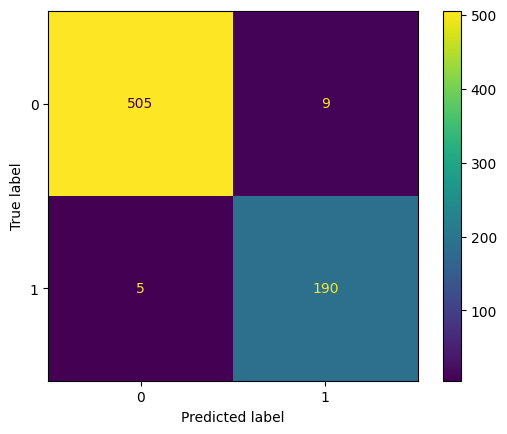

In [ ]:
#Printing the confusion matrix for Random Forest Classifier
cmd = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_m)
cmd.plot()
plt.show()

In the Confusion Matrix, the Columns correspond to the predictions made by the ml model, whereas the Rows represent the actual values of the test dataset or known truth.

In our case there are two categories to choose from which is death_event is false or death_event is true.

The top left contains the true negatives, these are patients that have mortality that were correctly predicted by the algorithm.

The true postives are on the bottom right, these are the patients that are survivors that were correctly predicted by the algorithm.

However the bottom left is false negatives, where the patient does have mortality, but the ml predictions state they dont.

The top right is false postives where the patient does not mortality but the ml algorithm states that they have.




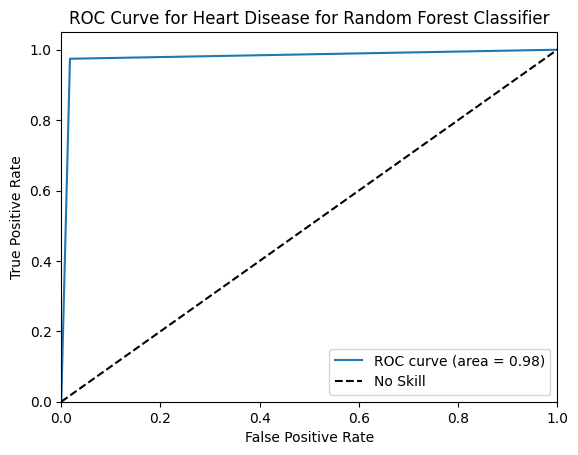

In [ ]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, YRFC)
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Heart Disease for Random Forest Classifier')
plt.legend()
plt.show()

Reciever Operator Characteristc ROC graphs provides a way to summurize all the information.

Y axis shows the true postive rate, which is the same as sensitvity. The X axis shows the false positive rate same thing as specitivity.

The true postive rate tells you the proportion of the true samples were correctly classified, i.e the proportion of mortality patients that were correctly classified.

The false postive rate tells you the proportion of the false samples were incorrectly classified, for instance the proportion of survivors that were incorrectly classified as mortality.

The no skill line shows where the True postive rate = False postive rate. Therefore it means that at any point on this line means that the proportion of correctly identified postives is the same as the proportion of the incorrectly classifed postives.

ROC Graph summarizes all of the confusion matrices that each classification threshold produced. From the ROC graph we can determine what threshold or cut off value is the best for each ml model for making a decision.

Area Under the Curve or AUC makes it easier to compare one ROC curve to another. If the AUC for model A is greater then the AUC for model B, we can state that model A is better then model B.

ROC curves make it easy to determine the best threshold for making a decision. Classifiers that give curves closer to the top-left corner indicate a better performance as they are better able to have a greater proportion of true postives compared to false postives. i.e if there is a point of (x = 10,y =100) we can infer that for 10 false postives the model will have 100 true postives, i.e 10:100.






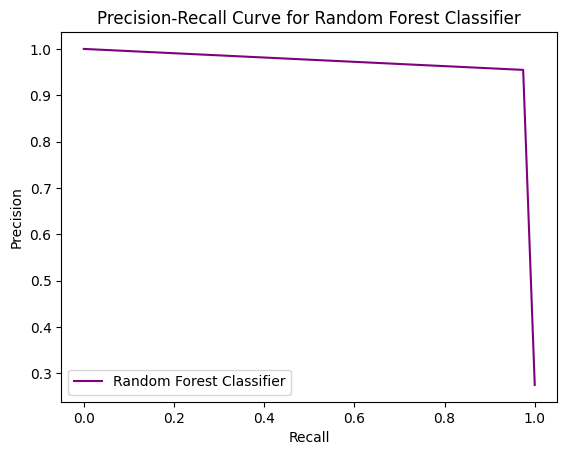

In [ ]:
#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, YRFC)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple', label = "Random Forest Classifier")



#add axis labels to plot
ax.set_title('Precision-Recall Curve for Random Forest Classifier')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.legend()
plt.show()

ROC and AUC has its limitations when we deal with inbalanced datasets, where the balance between postives and negatives are not 50:50.

Precision is how many instances of the predicted postive datapoints are actually positve. The Precision is not influcened by the number of negative datapoints, therefore its preferred with inbalanced datasets. Each point in the precsion graph is a threshold in which the precision and recall is calculated.

Recall is in the x axis in the precision recall graph.

Precision measures the percentage of correct predictions, while recall measures the percentage of relevant data points that were correctly identified.

Precision
The number of true positives divided by the number of true positives plus the number of false positives

Recall
The number of true positives divided by the number of true positives plus the number of false negatives



## Support Vector Machine (SVM)

In [ ]:
#Importing Support Vector Machine Classifier learning model.
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay

In [ ]:
#Training the Support Vector Machine model.
svm = SVC(kernel = "rbf", gamma = 0.5, C=1.0)
svm.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(gamma=0.5)

In [ ]:
svm.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 0.5,
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [ ]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1],
    'kernel': ['linear', 'rbf']
}

In [ ]:
grid_search = GridSearchCV(estimator=svm, param_grid = param_grid, cv = 3, n_jobs=-1)
grid_search.fit(X_train_balanced, y_train_balanced)

In [ ]:
y_svm = svm.predict(X_test)

In [ ]:
#Obtaining and printing the performance metrics for SVM.
accuracy = accuracy_score(y_test,y_svm)
print(f"Accuracy : {accuracy}")

precision = precision_score(y_test, y_svm)
print(f"Precision Score : {precision}")

recall = recall_score(y_test, y_svm)
print(f"Recall Score : {recall}")

f1score = f1_score(y_test, y_svm)
print(f"F1 Score: {f1score}")

confusion_m = confusion_matrix(y_test, y_svm)

roc_auc = roc_auc_score(y_test, y_svm)
print(f"ROC AUC Score : {roc_auc}")

prc = precision_recall_curve(y_test, y_svm)
print(f"Precision Recall Curve : {prc}")

precision, recall, thresholds = precision_recall_curve(y_test, y_svm)

auc_precision_recall = auc(recall, precision)
print(f"Precision Recall AUC : {auc_precision_recall}")

Accuracy : 0.9393511988716502
Precision Score : 1.0
Recall Score : 0.7794871794871795
F1 Score: 0.8760806916426513
ROC AUC Score : 0.8897435897435897
Precision Recall Curve : (array([0.27503526, 1.        , 1.        ]), array([1.        , 0.77948718, 0.        ]), array([0, 1]))
Precision Recall AUC : 0.9200679903077646


In [ ]:
#Printing the classification report for SVM
print(classification_report(y_test, y_svm))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       514
           1       1.00      0.78      0.88       195

    accuracy                           0.94       709
   macro avg       0.96      0.89      0.92       709
weighted avg       0.94      0.94      0.94       709



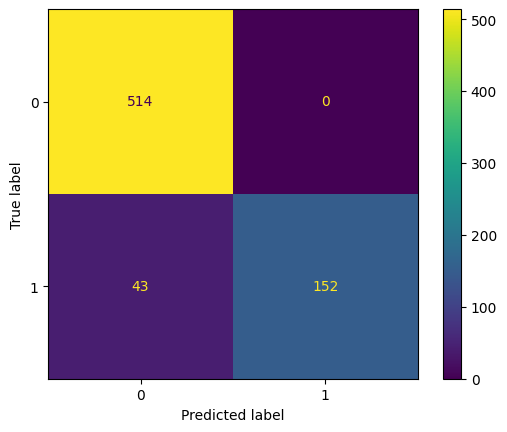

In [ ]:
#Printing the correlation matrix for SVM
cmd = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_m)
cmd.plot()
plt.show()

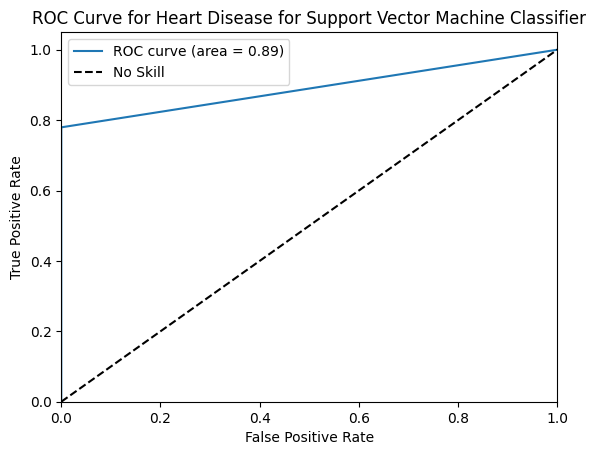

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_svm)
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Heart Disease for Support Vector Machine Classifier')
plt.legend()
plt.show()

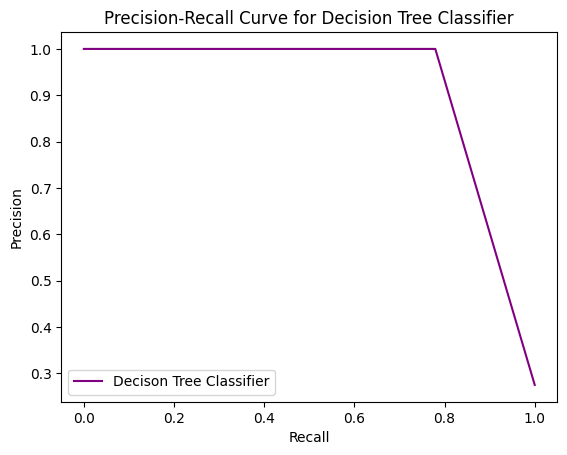

In [ ]:
#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_svm)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple', label = "Decison Tree Classifier")

#add axis labels to plot
ax.set_title('Precision-Recall Curve for Decision Tree Classifier')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.legend()
plt.show()

##  KNN Classifier

In [ ]:
#Importing KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#Training the KNN Classifier
knn = KNeighborsClassifier(metric = "manhattan", n_neighbors = 5, weights = "distance")
knn.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='manhattan', weights='distance')

In [ ]:
#Defining the parameter grid to be used for hyperparameter tuning with GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

In [ ]:
#Applying the GridSearch and displaying the best combination of parameters.
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train_balanced, y_train_balanced)

best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

Best parameters found:  {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}


In [ ]:
yknn = knn.predict(X_test)

In [ ]:
#Obtain and print out the performance metrics for KNN
accuracy = accuracy_score(y_test,yknn)
print(f"Accuracy : {accuracy}")

precision = precision_score(y_test, yknn)
print(f"Precision Score : {precision}")

recall = recall_score(y_test, yknn)
print(f"Recall Score : {recall}")

f1score = f1_score(y_test, yknn)
print(f"F1 Score: {f1score}")

confusion_m = confusion_matrix(y_test, yknn)

roc_auc = roc_auc_score(y_test, yknn)
print(f"ROC AUC Score: {roc_auc}")

prc = precision_recall_curve(y_test, yknn)
print(f"Precision Recall Curve : {prc}")

precision, recall, thresholds = precision_recall_curve(y_test, yknn)

auc_precision_recall = auc(recall, precision)
print(f"Precision Recall AUC : {auc_precision_recall}")

Accuracy : 0.9520451339915373
Precision Score : 0.9214659685863874
Recall Score : 0.9025641025641026
F1 Score: 0.9119170984455959
ROC AUC Score: 0.9366906115933352
Precision Recall Curve : (array([0.27503526, 0.92146597, 1.        ]), array([1.       , 0.9025641, 0.       ]), array([0, 1]))
Precision Recall AUC : 0.9254141893129038


In [ ]:
#Display the correlation matrix for KNN
print(classification_report(y_test,yknn))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       514
           1       0.92      0.90      0.91       195

    accuracy                           0.95       709
   macro avg       0.94      0.94      0.94       709
weighted avg       0.95      0.95      0.95       709



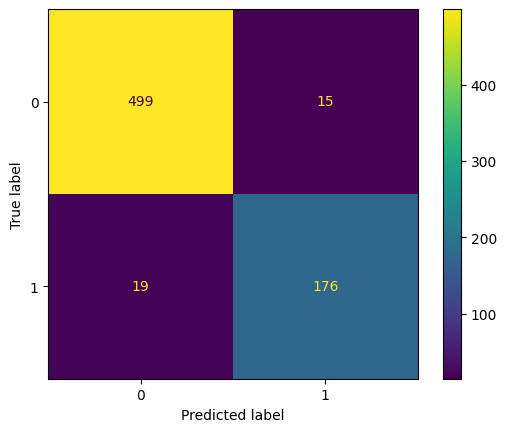

In [ ]:
cmd = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_m)
cmd.plot()
plt.show()

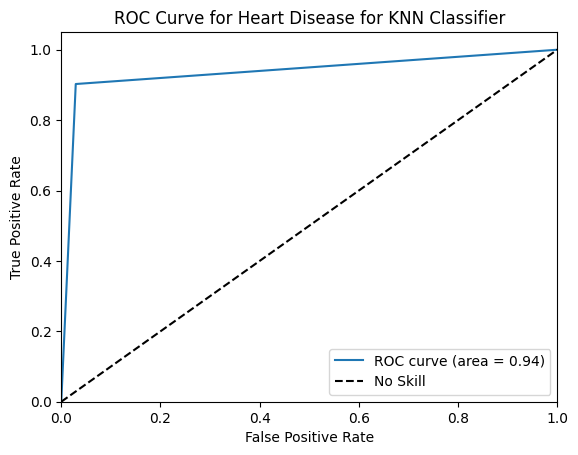

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, yknn)
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Heart Disease for KNN Classifier')
plt.legend()
plt.show()

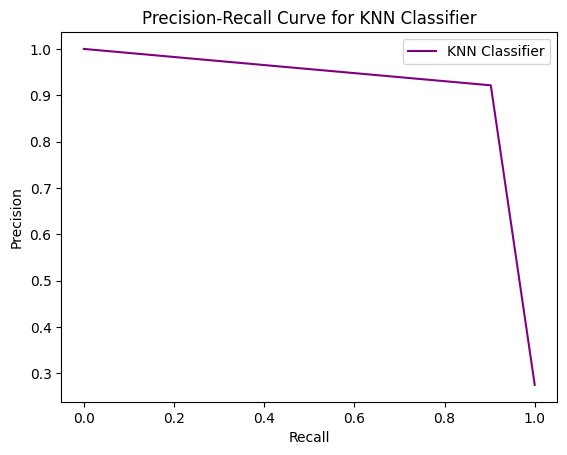

In [ ]:
#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, yknn)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple', label = "KNN Classifier")

#add axis labels to plot
ax.set_title('Precision-Recall Curve for KNN Classifier')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.legend()
plt.show()

# Artifical Neural Networks

In [ ]:
pip install tensorflow

In [ ]:
#Importing the necessary modules for Neural Network Deep Learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Activation, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

## Single Layer Perceptron

In [ ]:
#Creating a single layer perceptron network
singleLModel = Sequential([
Dense(1, activation = 'sigmoid')
])

In [ ]:
#Compling the single layer perceptron with adam optimizer, binary crossentropy for loss calculation and accuracy as the performance evaluation metric.
singleLModel.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [ ]:
#Fitting the single layer perceptron to the dataset
singleLModel.fit(X_train_balanced, y_train_balanced, validation_data = (X_test, y_test), epochs = 1000, batch_size = 32, verbose = 1)

Epoch 1/1000
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5504 - loss: 42.0168 - val_accuracy: 0.8138 - val_loss: 1.7152
Epoch 2/1000
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5872 - loss: 8.8709 - val_accuracy: 0.4866 - val_loss: 5.8002
Epoch 3/1000
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5870 - loss: 8.1153 - val_accuracy: 0.7800 - val_loss: 3.7117
Epoch 4/1000
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6180 - loss: 8.3896 - val_accuracy: 0.5853 - val_loss: 3.5217
Epoch 5/1000
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7025 - loss: 2.7041 - val_accuracy: 0.7814 - val_loss: 3.2924
Epoch 6/1000
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.6537 - loss: 5.3523 - val_accuracy: 0.7898 - val_loss: 2.9715
Epoch 7/1000
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6546 - loss: 3.7024 - val_accuracy: 0.7729 - val_loss: 3.8928
Epoch 8/1000
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.6181 - loss: 5.5815 - val_accuracy

In [ ]:
#Obtaining predictions of the learning model on the test dataset.
ySingleLModel = singleLModel.predict(X_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [ ]:
#Converting the predictions to int datatype to make it compatiable for use with classification performance metrics
ySingleLModel_binary = (ySingleLModel > 0.5).astype(int)


In [ ]:
ySingleLModel_binary


array([[1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
    

In [ ]:
#Obtain and print out the performance metrics for single layer perceptron model.
accuracy = accuracy_score(y_test,ySingleLModel_binary)
print(f"Accuracy : {accuracy}")

precision = precision_score(y_test,ySingleLModel_binary)
print(f"Precision Score : {precision}")

recall = recall_score(y_test, ySingleLModel_binary)
print(f"Recall Score : {recall}")

f1score = f1_score(y_test, ySingleLModel_binary)
print(f"F1 Score: {f1score}")

confusion_m = confusion_matrix(y_test,ySingleLModel_binary)

roc_auc = roc_auc_score(y_test, ySingleLModel_binary)
print(f"ROC AUC Score: {roc_auc}")

prc = precision_recall_curve(y_test, ySingleLModel_binary)
print(f"Precision Recall Curve : {prc}")

precision, recall, thresholds = precision_recall_curve(y_test, ySingleLModel_binary)

auc_precision_recall = auc(recall, precision)
print(f"Precision Recall AUC : {auc_precision_recall}")

Accuracy : 0.765867418899859
Precision Score : 0.5596707818930041
Recall Score : 0.6974358974358974
F1 Score: 0.6210045662100456
ROC AUC Score: 0.7446323456051082
Precision Recall Curve : (array([0.27503526, 0.55967078, 1.        ]), array([1.       , 0.6974359, 0.       ]), array([0, 1]))
Precision Recall AUC : 0.6701612381129699


In [ ]:
#Printing out the classifcation report for single layer perceptron model.
print(classification_report(y_test, ySingleLModel_binary))

              precision    recall  f1-score   support

           0       0.87      0.79      0.83       514
           1       0.56      0.70      0.62       195

    accuracy                           0.77       709
   macro avg       0.72      0.74      0.73       709
weighted avg       0.79      0.77      0.77       709



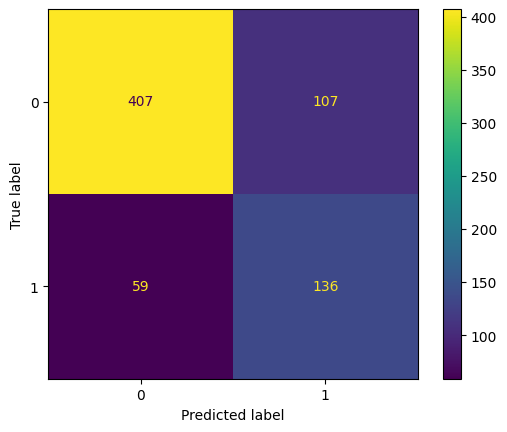

In [ ]:
#Printing out the confusion matrix.
cmd = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_m)
cmd.plot()
plt.show()

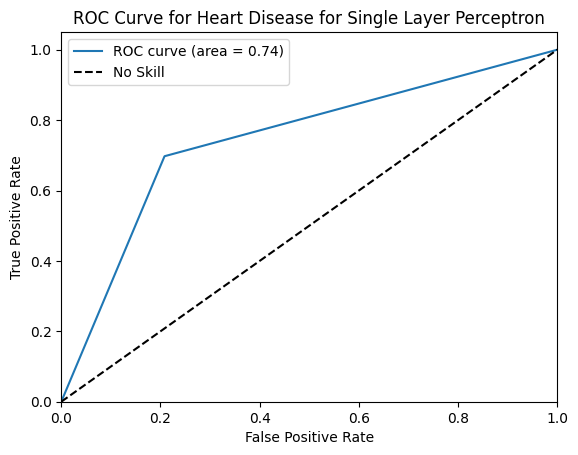

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, ySingleLModel_binary)
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Heart Disease for Single Layer Perceptron')
plt.legend()
plt.show()

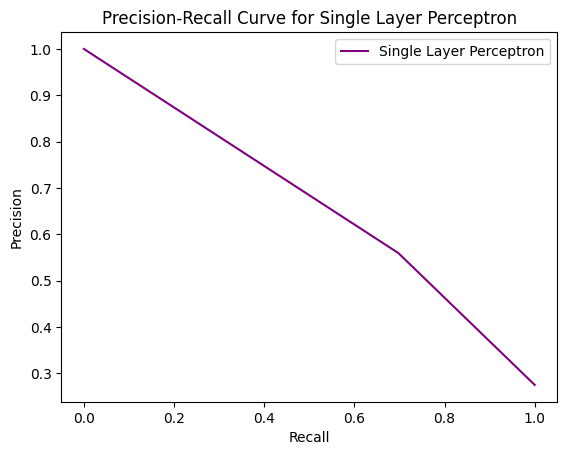

In [ ]:
#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, ySingleLModel_binary)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple', label = "Single Layer Perceptron")

#add axis labels to plot
ax.set_title('Precision-Recall Curve for Single Layer Perceptron')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.legend()
plt.show()

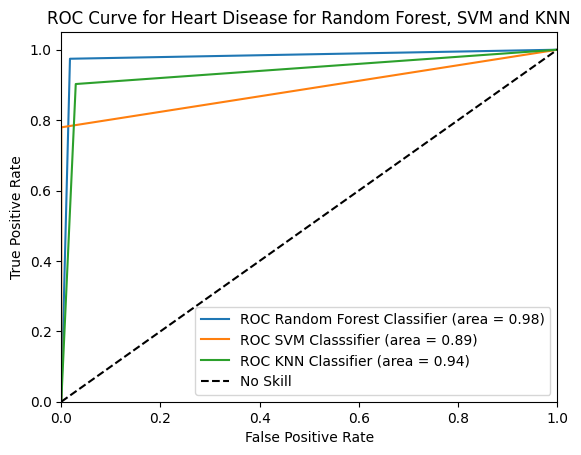

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, YRFC)
fpr2, tpr2, thresholds = roc_curve(y_test, y_svm)
fpr3, tpr3, thresholds = roc_curve(y_test, yknn)
fpr4, tpr4, thresholds = roc_curve(y_test,ySingleLModel_binary)
roc_auc = auc(fpr, tpr)
roc_auc2 = auc(fpr2, tpr2)
roc_auc3 = auc(fpr3, tpr3)
roc_auc4 = auc(fpr4, tpr4)
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC Random Forest Classifier (area = %0.2f)' % roc_auc)
plt.plot(fpr2, tpr2, label='ROC SVM Classsifier (area = %0.2f)' % roc_auc2)
plt.plot(fpr3, tpr3, label='ROC KNN Classifier (area = %0.2f)' % roc_auc3)
plt.plot(fpr4,tpr4, label='ROC Single Layer Perceptron (area = %0.2f)' % roc_auc4)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Heart Disease for Random Forest, SVM and KNN')
plt.legend()
plt.show()

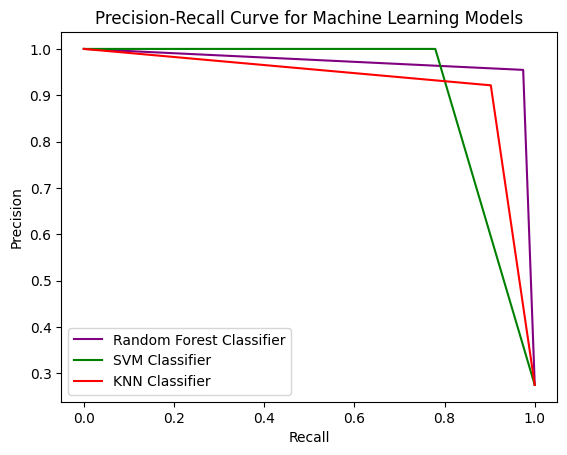

In [ ]:
#calculate precision and recall
precision1, recall1, thresholds1 = precision_recall_curve(y_test, YRFC)
precision2, recall2, thresholds2 = precision_recall_curve(y_test, y_svm)
precision3, recall3,thresholds3 = precision_recall_curve(y_test, yknn)
precision4, recall4, thresholds4 = precision_recall_curve(y_test, ySingleLModel_binary)


#create precision recall curve
fig, ax = plt.subplots()
plt.plot(recall1, precision1, color='purple', label = "Random Forest Classifier")
plt.plot(recall2, precision2, color='green', label = "SVM Classifier")
plt.plot(recall3, precision3, color='red', label = "KNN Classifier")
plt.plot(recall4, precision4, color = 'blue', label = "Single Layer Perceptron")

#add axis labels to plot
ax.set_title('Precision-Recall Curve for Machine Learning Models')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.legend()
plt.show()

## Multilayer Perceptron - (EXPERIMENTAL)

In [ ]:
mlpModel = Sequential([
    Dense(300, activation = "sigmoid"),
    Dense(30, activation = "relu"),
    Dropout(0.2),
    Dense(30, activation = "relu",kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    Dense(30, activation = "relu"),
    BatchNormalization(),
    Dense(1, activation = "sigmoid")
])

In [ ]:
mlpModel.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [ ]:
mlpModel.fit(X_train_balanced, y_train_balanced, validation_data = (X_test, y_test), epochs = 500, batch_size = 50, verbose = 1)

Epoch 1/500
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4924 - loss: 0.9148 - val_accuracy: 0.2750 - val_loss: 1.3262
Epoch 2/500
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4769 - loss: 0.7313 - val_accuracy: 0.7250 - val_loss: 0.6693
Epoch 3/500
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4988 - loss: 0.7070 - val_accuracy: 0.2750 - val_loss: 1.0358
Epoch 4/500
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5014 - loss: 0.7128 - val_accuracy: 0.2750 - val_loss: 0.9403
Epoch 5/500
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5057 - loss: 0.6997 - val_accuracy: 0.2750 - val_loss: 0.9853
Epoch 6/500
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5042 - loss: 0.7104 - val_accuracy: 0.2750 - val_loss: 0.7098
Epoch 7/500
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5075 - loss: 0.6976 - val_accuracy: 0.7250 - val_loss: 0.6713
Epoch 8/500
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5103 - loss: 0.7024 - val_accuracy: 0.7250 - 

In [ ]:
yMLP = mlpModel.predict(X_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [ ]:
yMLP_binary = (yMLP > 0.5).astype(int)

In [ ]:
accuracy = accuracy_score(y_test,yMLP_binary)
print(f"Accuracy : {accuracy}")

precision = precision_score(y_test,yMLP_binary)
print(f"Precision Score : {precision}")

recall = recall_score(y_test, yMLP_binary)
print(f"Recall Score : {recall}")

f1score = f1_score(y_test, yMLP_binary)
print(f"F1 Score: {f1score}")

confusion_m = confusion_matrix(y_test,yMLP_binary)

roc_auc = roc_auc_score(y_test, yMLP_binary)
print(f"ROC AUC Score: {roc_auc}")

prc = precision_recall_curve(y_test, yMLP_binary)
print(f"Precision Recall Curve : {prc}")

precision, recall, thresholds = precision_recall_curve(y_test, yMLP_binary)

auc_precision_recall = auc(recall, precision)
print(f"Precision Recall AUC : {auc_precision_recall}")

Accuracy : 0.2750352609308886
Precision Score : 0.2750352609308886
Recall Score : 1.0
F1 Score: 0.4314159292035398
ROC AUC Score: 0.5
Precision Recall Curve : (array([0.27503526, 1.        ]), array([1., 0.]), array([1]))
Precision Recall AUC : 0.6375176304654443


In [ ]:
print(classification_report(y_test, yMLP_binary))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       514
           1       0.28      1.00      0.43       195

    accuracy                           0.28       709
   macro avg       0.14      0.50      0.22       709
weighted avg       0.08      0.28      0.12       709



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


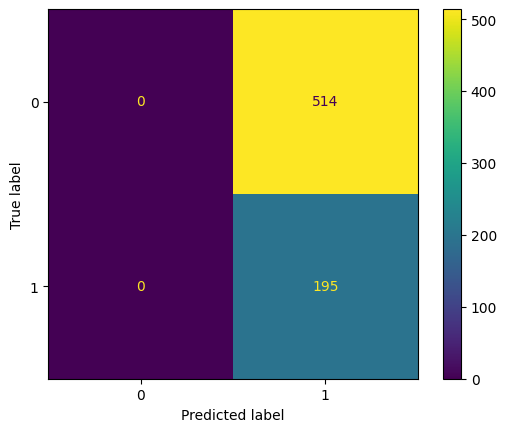

In [ ]:
cmd = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_m)
cmd.plot()
plt.show()

In [ ]:
mean_squared_error = MeanSquaredError()
mean_absolute_error = MeanAbsoluteError()

mse = mean_squared_error(y_test, yMLP)
print(f"MSE: {mse}")

mae = mean_absolute_error(y_test, yMLP)
print(f"MAE: {mae}")
